C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_10092\2863842235.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


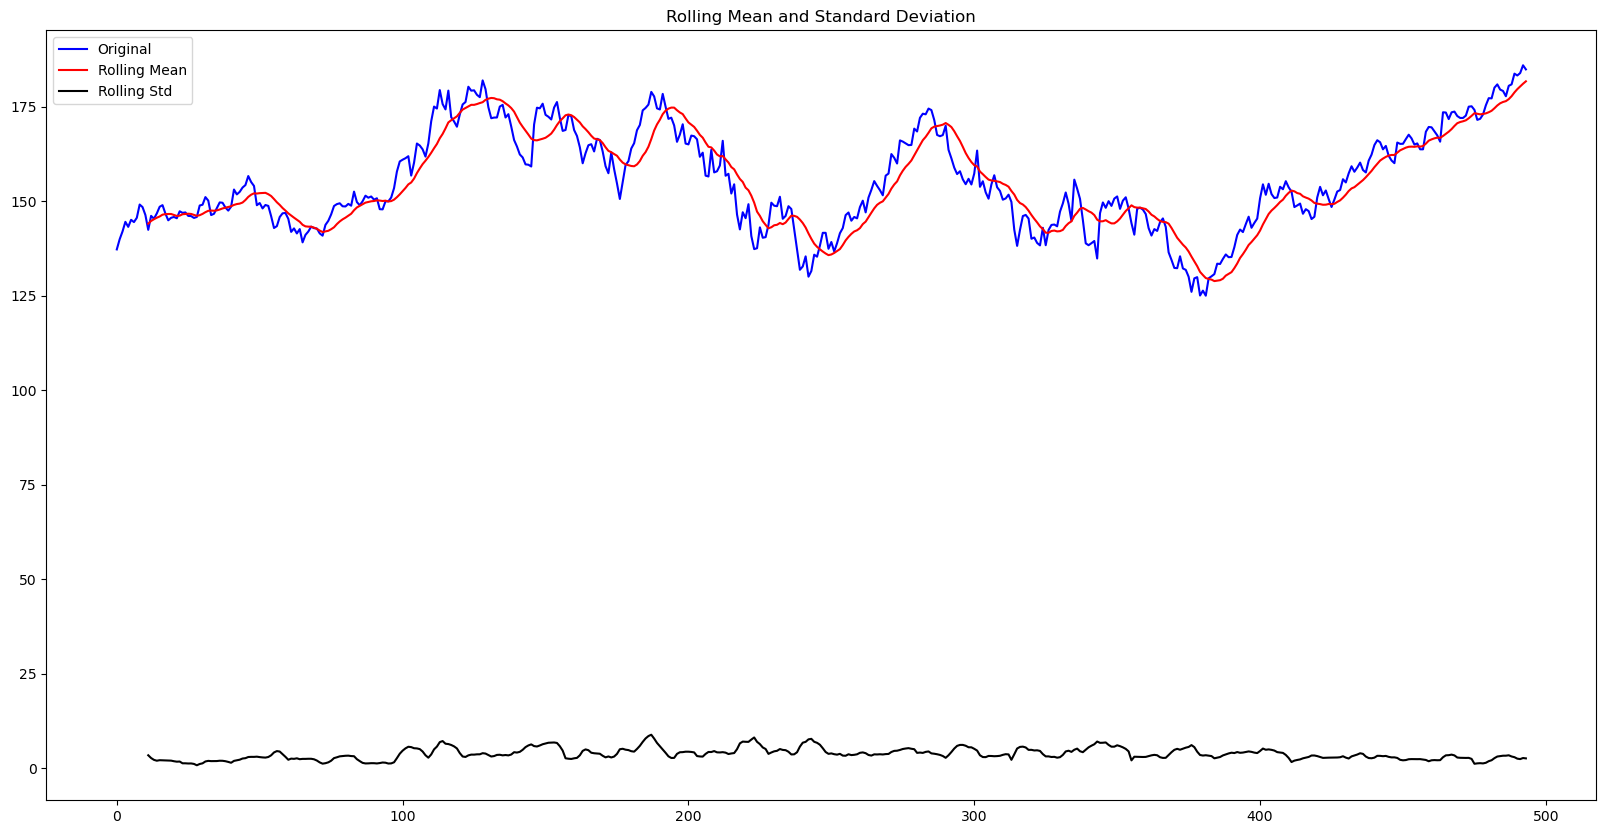

Results of Dickey-Fuller test
Test Statistics                 -2.110078
p-value                          0.240481
No. of lags used                 0.000000
Number of observations used    493.000000
Critical value (1%)             -3.443684
Critical value (5%)             -2.867420
Critical value (10%)            -2.569902
dtype: float64


In [3]:
import pyodbc
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Verbindungsstring zur MS SQL-Datenbank
conn_str = (
    r'Driver={SQL Server};'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur MS SQL-Datenbank herstellen und Daten abrufen
connection = pyodbc.connect(conn_str)
query = "SELECT timestamp, o, c, h, l FROM stock_data ORDER BY timestamp"
data = pd.read_sql(query, connection)

def test_adf(timeseries):
    moving_average = timeseries.rolling(12).mean()
    moving_std = timeseries.rolling(12).std()

    plt.figure(figsize=(20, 10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(moving_average, color="red", label='Rolling Mean')
    plt.plot(moving_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of Dickey-Fuller test")
    adft = adfuller(timeseries, autolag="AIC")
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    
    for key, value in adft[4].items():
        output['Critical value (%s) ' % key] = value

    print(output)

test_adf(data['c'])
